In [1]:
import qiskit
import sys
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
import qiskit_aer 
from qiskit.quantum_info import state_fidelity
from qiskit_aer import AerSimulator
#from qiskit import transpile
#from qiskit.quantum_info.states.random import random_statevector
#from qiskit.circuit.library import Initialize
#from qiskit.visualization import plot_bloch_multivector
import numpy as np
from qiskit.quantum_info import partial_trace # To check later whether our derived density matrix is correct
from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import purity
from scipy import linalg as la


from qiskit_aer.primitives import Sampler
from qiskit_aer.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Operator

from itertools import combinations, cycle #Used for fermi state
import math as m
import cmath as cm

from threading import Thread  ## For multithreading and paralell processing
import time

In [2]:
estimator = Estimator(approximation=True)

In [4]:
N = 2
num_qubits = 2*N + 1

In [15]:
imp_op = SparsePauliOp('I'*N + 'Z' + 'I'*N)

def ferm_mag(pos):
    op1 = SparsePauliOp('I'*(N+pos) + 'Z' + 'I'*(N-pos))
    op2 = SparsePauliOp('I'*(N-pos) + 'Z' + 'I'*(N+pos))

    ferm_mag_op = 0.5*(op2 - op1)
    #print(ferm_mag_op)
    return ferm_mag_op

def correlator_expectation2(pos,qc):
    op1 = ferm_mag(pos)
    corr_op = op1 @ imp_op
    job = estimator.run(qc,corr_op,shots = None)
    exp_vals = job.result().values[0].real
    return exp_vals

def reduced_corr(pos,qc):
    op1 = ferm_mag(pos)
    op2 = SparsePauliOp('I'*N + 'Z' + 'I'*N)
    job1 = estimator.run(qc,op1,shots = None)
    job2 = estimator.run(qc,op2,shots = None)
    exp_vals1 = job1.result().values[0].real
    exp_vals2 = job2.result().values[0].real
    print(exp_vals1,exp_vals2)
    exp_vals_red = exp_vals1*exp_vals2
    return exp_vals_red

def plot_correlator(qc,pos, corr_list):
    exp_vals = correlator_expectation2(pos,qc)
    exp_vals_red = reduced_corr(pos,qc)
    final_vals = exp_vals - exp_vals_red
    corr_list.append((final_vals.real,pos))

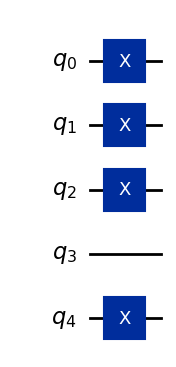

In [6]:
qc = QuantumCircuit(num_qubits)
qc.x([0,1,2,4])

qc.draw(output='mpl')

In [13]:
print(ferm_mag(2))
print(correlator_expectation2(0,qc))

SparsePauliOp(['ZIIII', 'IIIIZ'],
              coeffs=[ 0.5+0.j, -0.5+0.j])
0.0


In [16]:
print(reduced_corr(0,qc))

0.0 -1.0
-0.0
